# Quantum Teleportation

## Cirq

In [8]:
import cirq
import numpy as np

In [5]:
def make_quantum_teleportation_circuit(gate):
    circuit = cirq.Circuit()

    # Get the three qubits involved in the teleportation protocol.
    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # The input gate prepares the message to send.
    circuit.append(gate(msg))

    # Create a Bell state shared between Alice and Bob.
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Bell measurement of the Message and Alice's entangled qubit.
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])

    # Uses the two classical bits from the Bell measurement to recover the
    # original quantum message on Bob's entangled qubit.
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])

    return circuit

In [38]:
"""Visualize the teleportation circuit."""
# Gate to put the message qubit in some state to send.
gate = cirq.X ** 0.25
#gate = cirq.X
#gate = cirq.H

# Create the teleportation circuit.
circuit = make_quantum_teleportation_circuit(gate)
print("Teleportation circuit:\n")
print(circuit)

Teleportation circuit:

Alice: ─────H────────@───X───────M───@───────
                     │   │       │   │
Bob: ────────────────X───┼───────┼───X───@───
                         │       │       │
Message: ───X^0.25───────@───H───M───────@───


In [39]:
"""Display the Bloch vector of the message qubit."""
message = cirq.Circuit(gate.on(cirq.NamedQubit("Message"))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message, index=0)

print("Bloch vector of message qubit:")
print(np.round(message_bloch_vector, 3))

Bloch vector of message qubit:
[ 0.    -0.707  0.707]


In [40]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.simulate(circuit)

# Get the Bloch vector of Bob's qubit.
bobs_bloch_vector = cirq.bloch_vector_from_state_vector(result.final_state_vector, index=1)
print("Bloch vector of Bob's qubit:")
print(np.round(bobs_bloch_vector, 3))

Bloch vector of Bob's qubit:
[ 0.    -0.707  0.707]


## Qiskit

States of the three qubits before teleporting


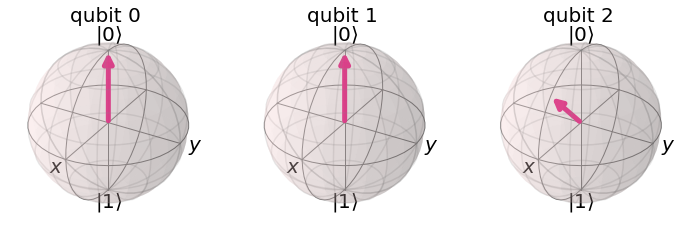

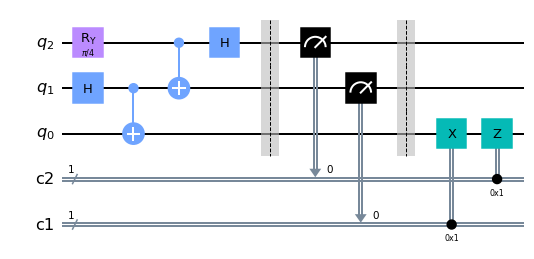

States of the three qubits after teleporting


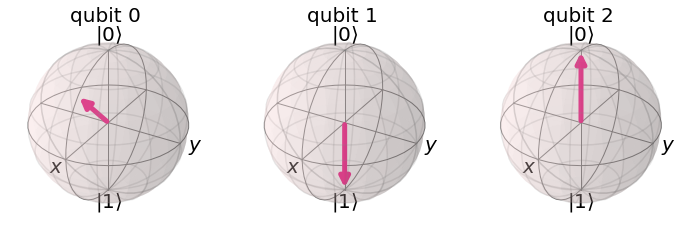

In [41]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
from math import pi

%matplotlib inline

# We need three qubits and two classical bits for the algorithm. 
q =  QuantumRegister(3,"q") 
# We have to define classical registers one by one since
# we are applying the C_if gate later
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)

# Crating the angle pi/4 = 45 degrees 
theta = pi*(1/4)
# Rotate the teleporting qubit
qc.ry(theta,q[2])

backend = Aer.get_backend('statevector_simulator') 
result = execute(qc, backend).result()
psi  = result.get_statevector()

print("States of the three qubits before teleporting")
# Displaying the three qubits in bloch sphere
display(plot_bloch_multivector(psi))

# Creating the bell state
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT gate - teleporting qubit as the control bit
qc.cx(q[2],q[1])

# Hadamard gate on the teleporting qubit
qc.h(q[2])

qc.barrier()

# Alice measure her qubits
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# Applying the classical if 
# If classical bit is set apply the gate
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

# draw the circuit
display(qc.draw(output='mpl',reverse_bits=True))

backend = Aer.get_backend('statevector_simulator') 
result = execute(qc, backend).result()
psi  = result.get_statevector()

print("States of the three qubits after teleporting")
# Displaying the three qubits in bloch sphere
display(plot_bloch_multivector(psi))

